In [1]:
# Dependencies
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt



In [2]:
#Import CSV file
csv_path = "Resource/Electric_Vehicle_Population_Data.csv"
car_df = pd.read_csv(csv_path)

In [3]:
#Clean data - extract the data we need. 

#Exclude the column that are not in WA state. 
WA_df = car_df.loc[(car_df["State"] == "WA")]

#Choose the data that after 2010. 
WA_2011_df = WA_df.loc[(WA_df["Model Year"] > 2010)]

#Remove the Column that won't use, include "Electric Utility" and "Base MSRP".
WA_2011_df = WA_2011_df.drop(columns=['Electric Utility', "Base MSRP"])

#Rename the data frame.
close_df = WA_2011_df


In [4]:
#Clean data - format the data.

#Change the data type of "Vehicle Location" to string and delete "POINT".
close_df['Vehicle Location'] = close_df['Vehicle Location'].astype('str').str.replace('POINT', '')

#Change the data type of "Postal Code" to integer.
close_df["Postal Code"] = close_df["Postal Code"].astype(int)
close_df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,2020 Census Tract
1,5YJXCBE27J,Island,Greenbank,WA,98253,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,10.0,326880081,(-122.575569 48.08489),5.302997e+10
8,1N4BZ0CP8H,Chelan,Wenatchee,WA,98801,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,12.0,192768747,(-120.336499 47.425146),5.300796e+10
10,WVWKR7AU3K,Snohomish,Edmonds,WA,98026,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,32.0,477565112,(-122.333046 47.829439),5.306105e+10
11,5YJ3E1EB0J,Island,Clinton,WA,98236,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,10.0,476402678,(-122.35803 47.9796),5.302997e+10
13,5YJ3E1EBXL,Snohomish,Brier,WA,98036,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,1.0,103288153,(-122.281856 47.811678),5.306105e+10


Stacked Bar - Top 4 most popular brand by county

In [5]:
#Extract the column that we need.
county_brand_df = close_df[["County", "Make"]]


In [6]:
#Extract the data related to Tesla.
Tesla = county_brand_df.loc[county_brand_df["Make"] == "TESLA"]
clean_Tesla = Tesla.loc[(Tesla["County"]!= "Ferry") & (Tesla["County"]!= "Garfield")]
clean_Tesla
Tesla_count = clean_Tesla.groupby(clean_Tesla["County"]).count()
Tesla_count.shape

(37, 1)

In [7]:
#Extrac the data related to Ford.
Ford = county_brand_df.loc[county_brand_df["Make"] == "FORD"]
clean_Ford = Ford.loc[Ford["County"]!= "Garfield"]
Ford_count = clean_Ford.groupby(clean_Ford["County"]).count()
Ford_count.shape

(37, 1)

In [8]:
#Extract the data related to Chevrolet. 
Chevrolet = county_brand_df.loc[county_brand_df["Make"] == "CHEVROLET"]
clean_Che = Chevrolet.loc[Chevrolet["County"]!= "Ferry"]
Chevrolet_count = clean_Che.groupby(clean_Che["County"]).count()
Chevrolet_count.shape

(37, 1)

In [9]:
#Extract the data related to Nissan.
Nissan = county_brand_df.loc[county_brand_df["Make"] == "NISSAN"]
clean_Nissan = Nissan.loc[Nissan["County"]!= "Ferry"]
Nissan_count = clean_Nissan.groupby(clean_Nissan["County"]).count()
Nissan_count.shape

(37, 1)

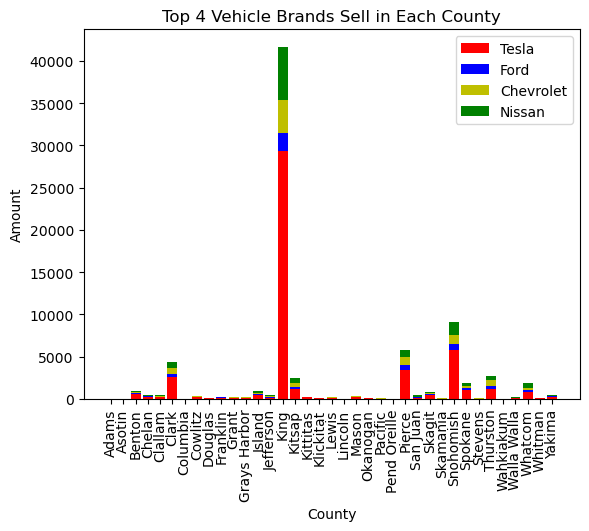

In [12]:
#Conver the data to list. 
County = Tesla_count.index
Tesla_number = Tesla_count["Make"]
Ford_number = Ford_count["Make"]
Chevrolet_number = Chevrolet_count["Make"]
Nissan_number = Nissan_count["Make"]


 
# plot bars in stack manner
plt.bar(County, Tesla_number, color='r')
plt.bar(County, Ford_number, bottom=Tesla_number, color='b')
plt.bar(County, Chevrolet_number, bottom=Tesla_number+Ford_number, color='y')
plt.bar(County, Nissan_number, bottom=Tesla_number+Ford_number+Chevrolet_number, color = 'g')
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Amount")
plt.legend(["Tesla", "Ford", "Chevrolet","Nissan"])
plt.title("Top 4 Vehicle Brands Sell in Each County")
plt.show()

In [13]:
# rule out king county
#Extract the data related to Tesla.
Tesla = county_brand_df.loc[county_brand_df["Make"] == "TESLA"]
clean_Tesla = Tesla.loc[(Tesla["County"]!= "Ferry") & (Tesla["County"]!= "Garfield") & (Tesla["County"]!="King")]
clean_Tesla
Tesla_count = clean_Tesla.groupby(clean_Tesla["County"]).count()
Tesla_count.shape

(36, 1)

In [14]:
#Extract the data related to Ford.
Ford = county_brand_df.loc[county_brand_df["Make"] == "FORD"]
clean_Ford = Ford.loc[(Ford["County"]!= "Garfield") & (Ford["County"]!="King")]
Ford_count = clean_Ford.groupby(clean_Ford["County"]).count()
Ford_count.shape

(36, 1)

In [15]:
#Extract the data related to Chevrolet.
Chevrolet = county_brand_df.loc[county_brand_df["Make"] == "CHEVROLET"]
clean_Che = Chevrolet.loc[(Chevrolet["County"]!= "Ferry") & (Chevrolet["County"]!= "King")]
Chevrolet_count = clean_Che.groupby(clean_Che["County"]).count()
Chevrolet_count.shape

(36, 1)

In [16]:
#Extract the data related to Nissan.
Nissan = county_brand_df.loc[county_brand_df["Make"] == "NISSAN"]
clean_Nissan = Nissan.loc[(Nissan["County"]!= "Ferry") & (Nissan["County"]!= "King")]
Nissan_count = clean_Nissan.groupby(clean_Nissan["County"]).count()
Nissan_count.shape

(36, 1)

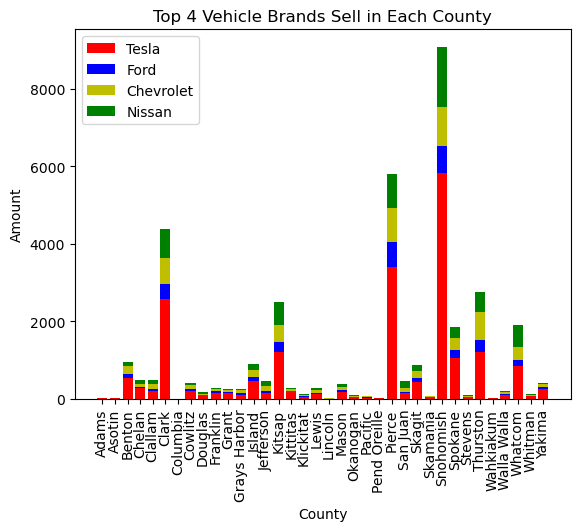

In [17]:
County = Tesla_count.index
Tesla_number = Tesla_count["Make"]
Ford_number = Ford_count["Make"]
Chevrolet_number = Chevrolet_count["Make"]
Nissan_number = Nissan_count["Make"]


 
# plot bars in stack manner
plt.bar(County, Tesla_number, color='r')
plt.bar(County, Ford_number, bottom=Tesla_number, color='b')
plt.bar(County, Chevrolet_number, bottom=Tesla_number+Ford_number, color='y')
plt.bar(County, Nissan_number, bottom=Tesla_number+Ford_number+Chevrolet_number, color = 'g')
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Amount")
plt.legend(["Tesla", "Ford", "Chevrolet","Nissan"])
plt.title("Top 4 Vehicle Brands Sell in Each County")
plt.show()